<a href="https://colab.research.google.com/github/vishutanwar/VishuTanwar-1/blob/master/lighthouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/suryanramamurthy/VishuTanwar

Cloning into 'VishuTanwar'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), done.


In [ ]:
%cd ./data
%cd ..
%cd content
%cd ./data

[Errno 2] No such file or directory: './data'
/
/
/content
/content/data


In [ ]:
ls

archive/  archive2/


In [ ]:
%cd ..

/content


In [ ]:
%cd ./data/archive2/

/content/data/archive2


In [ ]:
ls

2016Q1.csv.gz  2016Q3.csv.gz  2017Q1.csv.gz  2017Q3.csv.gz
2016Q2.csv.gz  2016Q4.csv.gz  2017Q2.csv.gz  2017Q4.csv.gz


In [ ]:
%cd content

/content


In [ ]:
%cd ..

/


In [ ]:
import os
os.mkdir("./data/archive2")

FileExistsError: ignored

In [ ]:
ls 

2016Q1.csv.gz  2016Q3.csv.gz  2017Q1.csv.gz  2017Q3.csv.gz
2016Q2.csv.gz  2016Q4.csv.gz  2017Q2.csv.gz  2017Q4.csv.gz


In [ ]:

path = "./data/archive2"
lst = os.listdir(path)

In [ ]:
lst

['2016Q4.csv.gz',
 '2017Q1.csv.gz',
 '2016Q3.csv.gz',
 '2016Q2.csv.gz',
 '2016Q1.csv.gz',
 '2017Q2.csv.gz',
 '2017Q4.csv.gz',
 '2017Q3.csv.gz']

In [ ]:
os.mkdir("./data/unziped")

In [ ]:
import gzip
def changer(my_filename):
  my_filename = "./data/archive2/"+ my_filename
  with gzip.open(my_filename, 'rt', newline = "") as gz_file:
    data = gz_file.read()
    with open(my_filename[:-3], 'wt') as out_file:
      out_file.write(data)

In [ ]:
for i in lst:
  changer(i)

In [ ]:
import shutil
for j in lst:
  filename = "./data/archive2/" + j[:-3]
  shutil.move(filename, "./data/unziped/")

In [ ]:
import pandas as pd
import glob

In [ ]:
df= pd.concat([pd.read_csv(csv_file, header=0) for csv_file in glob.glob(
        os.path.join("./data/unziped/", "201*.csv"))], axis=0, ignore_index=True)

In [ ]:
df.shape

(438991, 55)

In [ ]:
df.head()

,id,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths
0,120047387,1200,36 months,12.62%,40.22,Sales / Management,10+ years,MORTGAGE,60000.0,Fully Paid,...,1,95.0,100.0,0,48409,8500,NaN,NaN,NaN,NaN
1,115382731,27825,60 months,14.08%,648.60,Cashier,< 1 year,MORTGAGE,13000.0,Current,...,0,100.0,75.0,0,13750,17500,28681.0,739.0,May-94,0.0
2,114145828,6000,36 months,14.08%,205.30,NaN,NaN,MORTGAGE,18000.0,Current,...,2,100.0,50.0,0,5344,6400,NaN,NaN,NaN,NaN
3,113130769,20000,60 months,15.05%,476.33,cloud support engineer,2 years,RENT,120000.0,Current,...,1,100.0,66.7,0,85156,23100,NaN,NaN,NaN,NaN
4,118283716,5000,36 months,5.32%,150.58,Chef,< 1 year,OWN,30000.0,Current,...,0,100.0,0.0,0,2266,26500,NaN,NaN,NaN,NaN


In [ ]:
df['loan_status'].value_counts()

Current               251552
Fully Paid            132055
Charged Off            40902
Late (31-120 days)      8209
In Grace Period         4016
Late (16-30 days)       2257
Name: loan_status, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438991 entries, 0 to 438990
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              438991 non-null  int64  
 1   funded_amnt                     438991 non-null  int64  
 2   term                            438991 non-null  object 
 3   int_rate                        438991 non-null  object 
 4   installment                     438991 non-null  float64
 5   emp_title                       408624 non-null  object 
 6   emp_length                      408978 non-null  object 
 7   home_ownership                  438991 non-null  object 
 8   annual_inc                      438991 non-null  float64
 9   loan_status                     438991 non-null  object 
 10  purpose                         438991 non-null  object 
 11  zip_code                        438991 non-null  object 
 12  addr_state      

In [ ]:
df.columns

Index(['id', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_il_24m',
       'il_util', 'open_rv_24m', 'all_util', 'total_rev_hi_lim',
       'inq_last_12m', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'total_bal_ex_mort',
       'total_bc_limit', 'revol_bal_joint', 'sec_app_fico_range_high',
  

In [ ]:
mis_column=(df.isnull().sum())/ (df.shape[0])*100

In [ ]:
mis_column

id                                 0.000000
funded_amnt                        0.000000
term                               0.000000
int_rate                           0.000000
installment                        0.000000
emp_title                          6.917454
emp_length                         6.836814
home_ownership                     0.000000
annual_inc                         0.000000
loan_status                        0.000000
purpose                            0.000000
zip_code                           0.000000
addr_state                         0.000000
dti                                0.064922
delinq_2yrs                        0.000000
earliest_cr_line                   0.000000
fico_range_high                    0.000000
inq_last_6mths                     0.000000
mths_since_last_delinq            48.674346
open_acc                           0.000000
revol_bal                          0.000000
revol_util                         0.081778
total_acc                       

In [ ]:
# removing columns having more then 50% of missing values
missingvalue = list(mis_column[mis_column >= 50].index)
missingvalue

['annual_inc_joint',
 'dti_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths']

In [ ]:
df = df.drop(missingvalue,axis=1)
df.shape

(438991, 47)

In [ ]:
mis_column1=(df.isnull().sum())/ (df.shape[0])*100
mis_column1[mis_column1 != 0]

emp_title                  6.917454
emp_length                 6.836814
dti                        0.064922
mths_since_last_delinq    48.674346
revol_util                 0.081778
open_act_il                0.006150
open_il_24m                0.006150
il_util                   13.568615
open_rv_24m                0.006150
all_util                   0.016857
inq_last_12m               0.006150
bc_open_to_buy             1.182484
bc_util                    1.227588
mths_since_recent_bc       1.116652
percent_bc_gt_75           1.188407
dtype: float64

In [ ]:
n = df.nunique(axis=0)
n

id                        438991
funded_amnt                 1554
term                           2
int_rate                     169
installment                44023
emp_title                 120032
emp_length                    11
home_ownership                 5
annual_inc                 28079
loan_status                    6
purpose                       14
zip_code                     908
addr_state                    50
dti                         6986
delinq_2yrs                   29
earliest_cr_line             680
fico_range_high               38
inq_last_6mths                 6
mths_since_last_delinq       147
open_acc                      74
revol_bal                  61561
revol_util                  1163
total_acc                    126
application_type               2
open_act_il                   44
open_il_24m                   27
il_util                      242
open_rv_24m                   46
all_util                     175
total_rev_hi_lim           11275
inq_last_1

In [ ]:
df = df.drop(["emp_title", "addr_state", "zip_code",'id',"mths_since_last_delinq","total_bc_limit","total_bal_ex_mort","percent_bc_gt_75","num_tl_op_past_12m","num_sats","num_rev_tl_bal_gt_0","num_rev_accts"
             ,"num_accts_ever_120_pd","mths_since_recent_bc","acc_open_past_24mths","inq_last_12m","total_rev_hi_lim"],axis=1)

In [ ]:
df.shape

(438991, 30)

In [ ]:
#removing null value
df = df.dropna(how="any") 
df=df.drop_duplicates(keep='first')
df.shape

(353169, 30)

In [ ]:
df['loan_status'].value_counts()

Current               200984
Fully Paid            107611
Charged Off            32874
Late (31-120 days)      6568
In Grace Period         3314
Late (16-30 days)       1818
Name: loan_status, dtype: int64

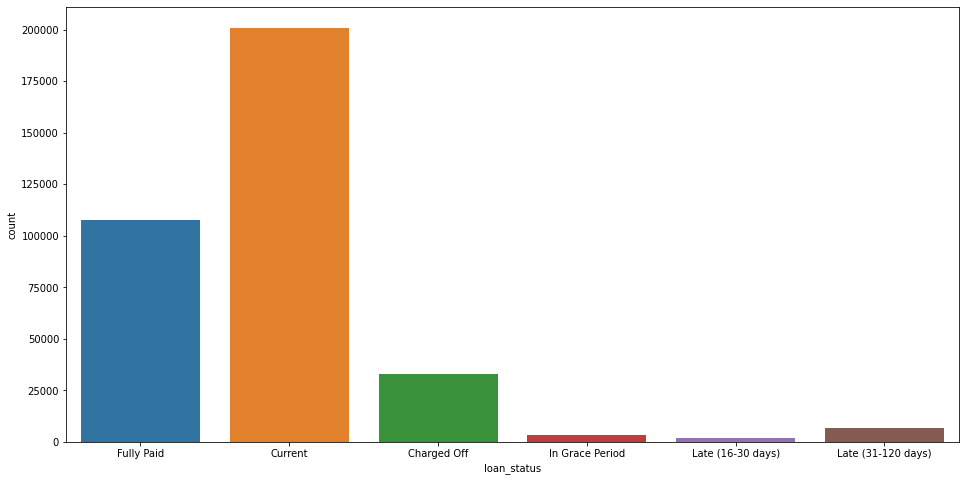

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(x='loan_status',data=df)
plt.show()

we are considering current and fully paid as Good loan and other status as Bad Loan

In [ ]:
df['loan_status']=df['loan_status'].apply( lambda x: 1 if x in ("Current","Fully Paid") else 0)

In [ ]:
df['loan_status'].value_counts()

1    308595
0     44574
Name: loan_status, dtype: int64

In [ ]:
good_loan = (sum(df['loan_status'])/len(df['loan_status'].index))*100
good_loan

87.378846954291

In [ ]:
df.shape

(353169, 30)

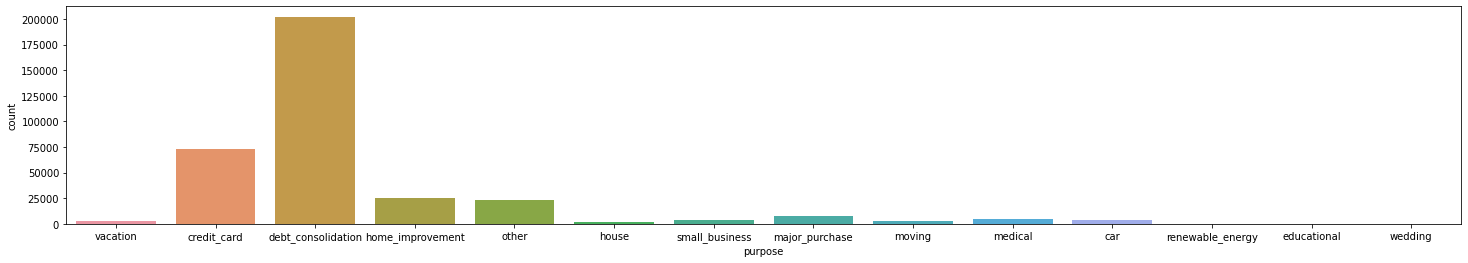

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x='purpose',data=df)
plt.show()

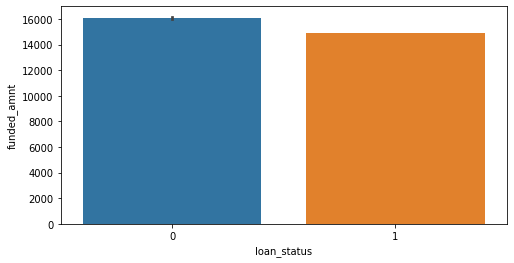

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='loan_status',y='funded_amnt',data=df)
plt.show()

<Figure size 1152x576 with 0 Axes>

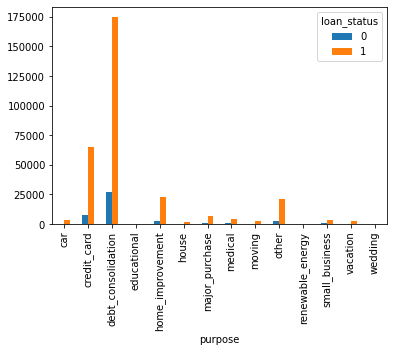

In [ ]:
plt.figure(figsize=(16,8))
Crosstab=pd.crosstab(index=df['purpose'],columns=df['loan_status'])
Crosstab.plot.bar()
plt.show()

In [ ]:
df.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,0].sort_values()

purpose
car                   0.093961
credit_card           0.105306
home_improvement      0.110908
major_purchase        0.119644
medical               0.124506
other                 0.125558
vacation              0.129524
house                 0.134336
debt_consolidation    0.134828
moving                0.154690
renewable_energy      0.160173
small_business        0.193606
Name: loan_status, dtype: float64

small business more likely to be bad loans

In [ ]:
df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,44574.0,16080.691098,9237.629043,1000.0,9000.0,15000.0,21575.0,40000.0
1,308595.0,14908.282296,9328.536809,1000.0,8000.0,12250.0,20000.0,40000.0


In [ ]:
100*((df['term'].value_counts())/df.shape[0])

 36 months    72.180458
 60 months    27.819542
Name: term, dtype: float64

In [ ]:
100*((df.groupby('term')['loan_status'].value_counts())/ df.shape[0])

term        loan_status
 36 months  1              63.942192
            0               8.238266
 60 months  1              23.436655
            0               4.382888
Name: loan_status, dtype: float64

About 72% of the completed loans have three-year periods, and the rest have five-year periods. Loans with 3-year periods are more than twice as likely to charge-off as loans with 5-year periods.

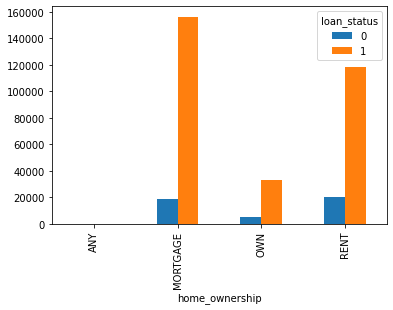

In [ ]:
Crosstab=pd.crosstab(index=df['home_ownership'],columns=df['loan_status'])
Crosstab.plot.bar()
plt.show()

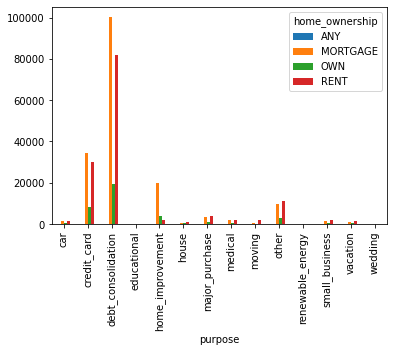

In [ ]:
Crosstab=pd.crosstab(index=df['purpose'],columns=df['home_ownership'])
Crosstab.plot.bar()

There appear to be large differences in bad loan rates by home ownership status. Renters and Mortage have a higher probability of charge-off or other bad loans.

In [ ]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,0]

home_ownership
ANY         0.110599
MORTGAGE    0.108027
OWN         0.128816
RENT        0.148390
Name: loan_status, dtype: float64

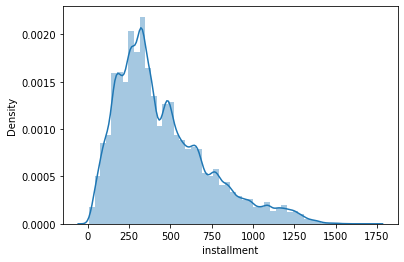

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['installment'])
plt.show()

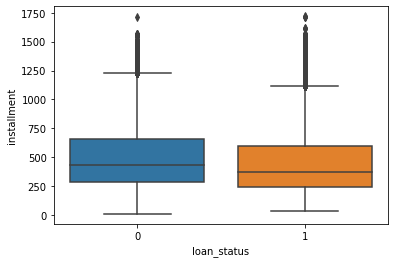

In [ ]:
sns.boxplot(y='installment',x='loan_status',data=df)

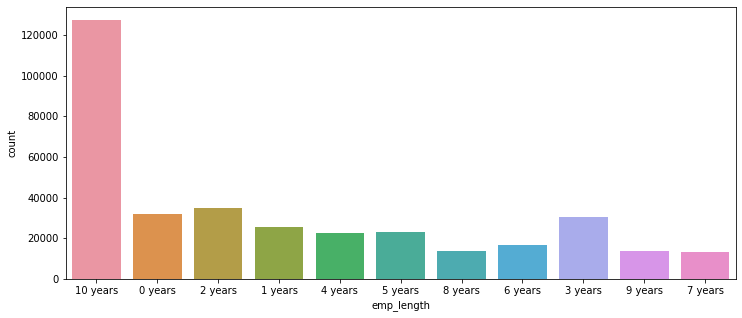

In [ ]:
df['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df['emp_length'].replace('< 1 years', '0 years', inplace=True)
df['emp_length'].replace('< 1 year', '0 years', inplace=True)
df['emp_length'].replace('1 year', '1 years', inplace=True)
plt.figure(figsize = (12, 5))
sns.countplot(df['emp_length'])
plt.show()

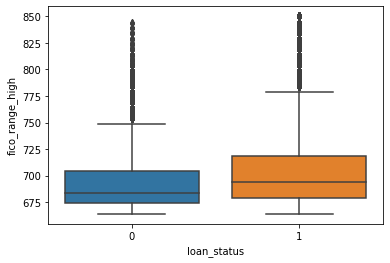

In [ ]:
import seaborn as sns
sns.boxplot(y='fico_range_high',x='loan_status',data=df)
plt.show()

In [ ]:
df.groupby('loan_status')['fico_range_high'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,44574.0,691.404653,25.755466,664.0,674.0,684.0,704.0,844.0
1,308595.0,703.148298,33.074807,664.0,679.0,694.0,719.0,850.0


In [ ]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,44574.0,1.240634,1.669297,0.0,0.0,1.0,2.0,19.0
1,308595.0,1.530896,1.816901,0.0,0.0,1.0,2.0,37.0


In [ ]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
       'open_act_il', 'open_il_24m', 'il_util', 'open_rv_24m', 'all_util',
       'bc_open_to_buy', 'bc_util', 'mort_acc', 'num_tl_90g_dpd_24m',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df['term']=df['term'].apply(lambda x: 36 if x== '36 months' else 60)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353169 entries, 0 to 438990
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   funded_amnt           353169 non-null  int64  
 1   term                  353169 non-null  int64  
 2   int_rate              353169 non-null  object 
 3   installment           353169 non-null  float64
 4   emp_length            353169 non-null  object 
 5   home_ownership        353169 non-null  object 
 6   annual_inc            353169 non-null  float64
 7   loan_status           353169 non-null  int64  
 8   purpose               353169 non-null  object 
 9   dti                   353169 non-null  float64
 10  delinq_2yrs           353169 non-null  int64  
 11  earliest_cr_line      353169 non-null  object 
 12  fico_range_high       353169 non-null  int64  
 13  inq_last_6mths        353169 non-null  float64
 14  open_acc              353169 non-null  int64  
 15  

In [ ]:
df_final = pd.get_dummies(df,columns=["home_ownership",'purpose',"application_type"])
df_final['emp_length'].value_counts()

10 years    127384
2 years      34652
0 years      32154
3 years      30466
1 years      25355
5 years      22962
4 years      22813
6 years      16524
9 years      13961
8 years      13805
7 years      13093
Name: emp_length, dtype: int64

In [ ]:
df_final['int_rate']=(df_final['int_rate'].str.replace("%",'',regex=False)).astype(float)
df_final['emp_length']=(df_final['emp_length'].str.replace("years",'',regex=False)).astype(int)
df_final=df_final.drop(['earliest_cr_line','revol_util'],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353169 entries, 0 to 438990
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   funded_amnt                  353169 non-null  int64  
 1   term                         353169 non-null  int64  
 2   int_rate                     353169 non-null  float64
 3   installment                  353169 non-null  float64
 4   emp_length                   353169 non-null  int64  
 5   annual_inc                   353169 non-null  float64
 6   loan_status                  353169 non-null  int64  
 7   dti                          353169 non-null  float64
 8   delinq_2yrs                  353169 non-null  int64  
 9   fico_range_high              353169 non-null  int64  
 10  inq_last_6mths               353169 non-null  float64
 11  open_acc                     353169 non-null  int64  
 12  revol_bal                    353169 non-null  int64  
 13 

In [ ]:
df_final.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,funded_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_high,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Individual,application_type_Joint App
count,353169.000000,353169.0,353169.000000,353169.000000,353169.000000,3.531690e+05,353169.000000,353169.000000,353169.000000,353169.000000,...,353169.000000,353169.000000,353169.000000,353169.000000,353169.000000,353169.000000,353169.000000,353169.000000,353169.000000,353169.000000
mean,15056.253805,60.0,13.189845,450.181812,5.925897,8.313554e+04,0.873788,19.835278,0.356328,701.666115,...,0.023193,0.013622,0.007999,0.067248,0.000654,0.011159,0.007979,0.000003,0.946247,0.053753
std,9325.230497,0.0,5.107614,277.412211,3.749245,8.592030e+04,0.332088,10.770653,0.950188,32.477742,...,0.150516,0.115917,0.089079,0.250452,0.025567,0.105045,0.088969,0.001683,0.225531,0.225531
min,1000.000000,60.0,5.320000,6.680000,0.000000,2.500000e+01,0.000000,-1.000000,0.000000,664.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,60.0,9.490000,248.480000,2.000000,5.000000e+04,1.000000,13.410000,0.000000,674.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12800.000000,60.0,12.620000,377.600000,6.000000,7.000000e+04,1.000000,19.000000,0.000000,694.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,20000.000000,60.0,15.990000,602.300000,10.000000,1.000000e+05,1.000000,25.340000,0.000000,719.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
90%,30000.000000,60.0,19.990000,846.984000,10.000000,1.383776e+05,1.000000,30.870000,1.000000,744.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
95%,35000.000000,60.0,23.880000,1025.310000,10.000000,1.720000e+05,1.000000,33.780000,2.000000,769.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
99%,40000.000000,60.0,29.690000,1265.160000,10.000000,2.920000e+05,1.000000,42.833200,4.000000,804.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df_final.drop(['loan_status'], axis=1)
y=df_final['loan_status']
X.head()

,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Individual,application_type_Joint App
0,1200,60,12.62,40.22,10,60000.0,26.16,0,714,0.0,...,0,0,0,0,0,0,1,0,1,0
1,27825,60,14.08,648.60,0,13000.0,59.83,0,744,0.0,...,0,0,0,0,0,0,0,0,0,1
3,20000,60,15.05,476.33,2,120000.0,18.66,0,699,0.0,...,0,0,0,0,0,0,0,0,1,0
4,5000,60,5.32,150.58,0,30000.0,9.84,0,819,0.0,...,0,0,0,0,0,0,0,0,1,0
5,8000,60,15.05,277.52,10,75000.0,10.77,0,699,1.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X['bc_open_to_buy'].head()

0       89.0
1     5914.0
3     3184.0
4    24388.0
5      594.0
Name: bc_open_to_buy, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train[['funded_amnt','term','int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','fico_range_high','inq_last_6mths','revol_bal','total_acc','open_act_il','open_il_24m','il_util','open_rv_24m','all_util','bc_open_to_buy','bc_util','mort_acc','num_tl_90g_dpd_24m','pct_tl_nvr_dlq','pub_rec_bankruptcies']] = scaler.fit_transform(x_train[['funded_amnt','term','int_rate','installment','emp_length','annual_inc','dti',
                                'delinq_2yrs','fico_range_high','inq_last_6mths','revol_bal','total_acc','open_act_il','open_il_24m','il_util','open_rv_24m','all_util',
                                'bc_open_to_buy','bc_util','mort_acc','num_tl_90g_dpd_24m','pct_tl_nvr_dlq','pub_rec_bankruptcies']])

x_train.head()

,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Individual,application_type_Joint App
313288,-0.751005,0.0,-1.115302,-0.720179,-1.045343,-0.404548,-0.497913,-0.375468,0.072230,-0.650554,...,0,0,0,0,0,0,0,0,1,0
380529,-0.544804,0.0,0.546083,-0.358562,-0.511957,-0.379355,-0.054139,-0.375468,-0.851699,-0.650554,...,0,0,0,0,0,0,0,0,1,0
181120,0.097898,0.0,0.092622,-0.293573,0.821508,0.369987,-0.809460,-0.375468,0.226218,-0.650554,...,0,0,0,0,0,0,0,0,1,0
131469,-0.223453,0.0,0.950679,0.069593,-1.045343,-0.807636,2.837639,-0.375468,-0.081758,0.536978,...,0,0,0,1,0,0,0,0,0,1
269036,-0.009219,0.0,-1.021483,0.067648,-0.245264,-0.186628,-0.765989,-0.375468,-0.543722,-0.650554,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
100*(y_train.value_counts()/ len(y_train))

1    87.37147
0    12.62853
Name: loan_status, dtype: float64

its an imbalance data ,we need to use SMOTe method to balance the data. i am unable to install SMOTE so i am skipping this step and proceeding with the model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             
rfe = rfe.fit(x_train, y_train)


In [ ]:
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

[ True False  True  True False  True False False  True  True False False
 False False  True False  True False  True False False False False False
 False  True False  True  True  True  True False  True  True  True False
 False  True  True  True False False  True  True]
[ 1 22  1  1 14  1  4  7  1  1 20  8 21  5  1  3  1 10  1 19  2 13  9 18
 12  1 11  1  1  1  1 23  1  1  1 15 16  1  1  1  6 17  1  1]


Index(['funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'fico_range_high', 'inq_last_6mths', 'open_il_24m', 'open_rv_24m',
       'bc_open_to_buy', 'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'application_type_Individual', 'application_type_Joint App'],
      dtype='object')

In [ ]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))


[('funded_amnt', True, 1),
 ('term', False, 22),
 ('int_rate', True, 1),
 ('installment', True, 1),
 ('emp_length', False, 14),
 ('annual_inc', True, 1),
 ('dti', False, 4),
 ('delinq_2yrs', False, 7),
 ('fico_range_high', True, 1),
 ('inq_last_6mths', True, 1),
 ('open_acc', False, 20),
 ('revol_bal', False, 8),
 ('total_acc', False, 21),
 ('open_act_il', False, 5),
 ('open_il_24m', True, 1),
 ('il_util', False, 3),
 ('open_rv_24m', True, 1),
 ('all_util', False, 10),
 ('bc_open_to_buy', True, 1),
 ('bc_util', False, 19),
 ('mort_acc', False, 2),
 ('num_tl_90g_dpd_24m', False, 13),
 ('pct_tl_nvr_dlq', False, 9),
 ('pub_rec_bankruptcies', False, 18),
 ('home_ownership_ANY', False, 12),
 ('home_ownership_MORTGAGE', True, 1),
 ('home_ownership_OWN', False, 11),
 ('home_ownership_RENT', True, 1),
 ('purpose_car', True, 1),
 ('purpose_credit_card', True, 1),
 ('purpose_debt_consolidation', True, 1),
 ('purpose_educational', False, 23),
 ('purpose_home_improvement', True, 1),
 ('purpose_hou

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty= 'l2')
classifier.fit(x_train[x_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
    #Predicting Test Set
y_pred = classifier.predict(x_test[x_train.columns[rfe.support_]])
acc = metrics.accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
print(acc,prec,rec)

0.8739039744787684 0.8739605259431958 0.9999244035983887
